In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column', None)

#Load Dataset
df  = sns.load_dataset('iris')

#Summarize the Dataset
def initial_analysis(df):
    print('Data_Shape:')
    print(df.shape)
    print('Data_Types:')
    print(df.dtypes)
    print('data_ifno:')
    print(df.info())
    print('Data_Sample:')
    print(df.head())
    print('Columns:')
    print(df.columns)
    print('Basic_Stat:')
    print(df.describe(include = 'all'))
    print('Null_Value:')
    print(df.isnull().sum())

In [2]:
#inspect dataset    
initial_analysis(df)  

Data_Shape:
(150, 5)
Data_Types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
data_ifno:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Data_Sample:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.

In [3]:
#Class Distribution
df.groupby('species').count() #equaly distributed

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

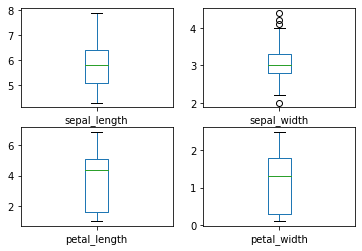

In [4]:
#Data Visualization
#lets first see Univariate Plots

df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0297CAF08>,
      dtype=object)

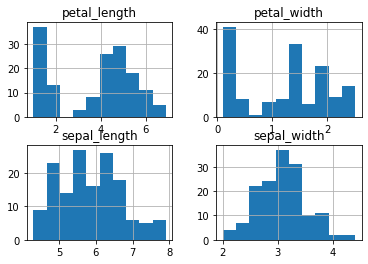

In [5]:
#lest see distribution of features
df.hist()


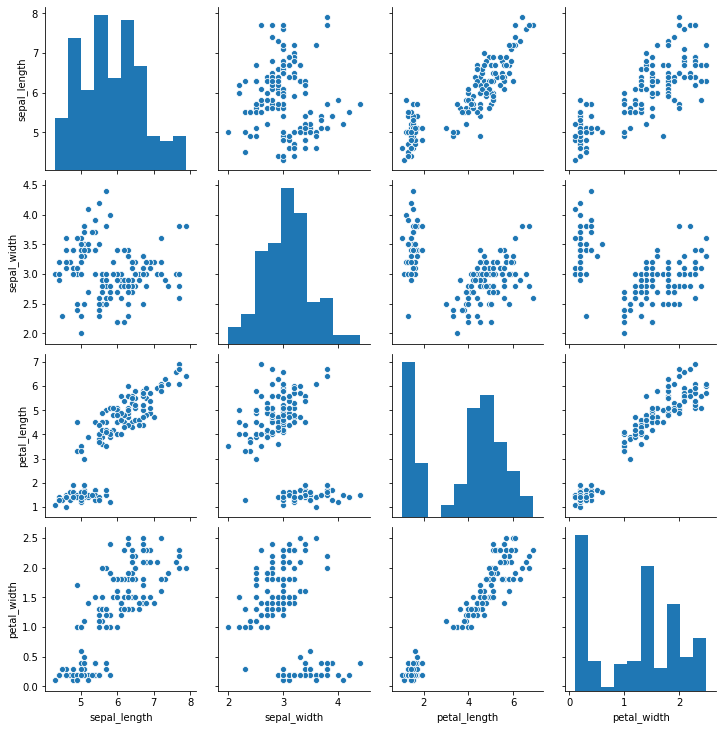

In [6]:
#Multivariate Plots
sns.pairplot(df) # from this we can easyly see the relation b/w features

In [7]:
#Now it is time to create some models of the data and estimate their accuracy


X = df.iloc[:, 0:-1]  #independent features
y = df.iloc[:, -1]    # dependent feature

In [8]:
#let us devide avilabe data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

In [22]:
#let us check which model will work perfectly

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# for building model
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs = -1)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.933333 (0.033333)
LDA: 0.975000 (0.020412)
KNN: 0.941667 (0.042492)
DTC: 0.916667 (0.045644)
NB: 0.950000 (0.048591)
SVM: 0.958333 (0.045644)
RFC: 0.950000 (0.048591)


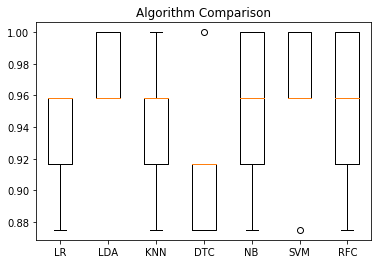

In [23]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [15]:
#Build Models

# for tuning parameter
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


# for checking accuray
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
def find_best_model_using_gridsearchcv(X,y):
      
    algo = {
        
        'LogisticRegression': {'model': LogisticRegression(), 'params':{'C':[1.0, .5],'solver':['liblinear','lbfgs'] }},
        'LinearDiscriminantAnalysis':{'model': LinearDiscriminantAnalysis(), 'params':{'tol':[.001,.0001, .00001], 'solver':['svd', 'lsqr']}},
        'DecisionTreeClassifier':{'model':DecisionTreeClassifier(), 'params':{'criterion':['gini','entropy'],'splitter':['best', 'random'] }},
        'KNeighborsClassifier':{'model':KNeighborsClassifier(), 'params':{'n_neighbors':[5,10], 'leaf_size':[30,50]}},
        'GaussianNB':{'model':GaussianNB(), 'params':{'var_smoothing':[1e-9, 1e-10]}},
        'SVC':{'model':SVC(), 'params':{'C':[.1, .5, 1], 'kernel':['rbf','linear']}},
        'RandomForestClassifier':{'model':RandomForestClassifier(), 'params':{'n_estimators':[10,100,200,300], 'criterion':['mse','entropy']}}
        
        }
    score = []
    
    cv = ShuffleSplit(n_splits = 5, test_size = .20, random_state = 0)
    for algo_name, config in algo.items():
        gs = GridSearchCV(estimator = config['model'], param_grid =config['params'] , cv = cv, return_train_score = False, n_jobs = -1)
        
        gs.fit(X_train,y_train)
              
        score.append({
            "model_name": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
            })
    
    return pd.DataFrame(score, columns=['model_name','best_score','best_params'])

In [25]:
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,model_name,best_score,best_params
0,LogisticRegression,0.925000,"{'C': 1.0, 'solver': 'lbfgs'}"
1,LinearDiscriminantAnalysis,0.958333,"{'solver': 'svd', 'tol': 0.001}"
2,DecisionTreeClassifier,0.916667,"{'criterion': 'gini', 'splitter': 'random'}"
3,KNeighborsClassifier,0.925000,"{'leaf_size': 30, 'n_neighbors': 5}"
4,GaussianNB,0.916667,{'var_smoothing': 1e-09}
5,SVC,0.950000,"{'C': 0.5, 'kernel': 'linear'}"
6,RandomForestClassifier,0.925000,"{'criterion': 'entropy', 'n_estimators': 10}"


In [ ]:
#lets pick any one model as all model provide more than 90% accuracy.

In [26]:
#Make Predictions
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction = model_knn.predict(X_test)

In [27]:
prediction

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa'],
      dtype=object)

In [28]:
#Evaluate Predictions
print(accuracy_score(y_test, prediction))

0.9666666666666667


In [29]:
print(confusion_matrix(y_test, prediction))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [30]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [31]:
model_knn.predict([[6.8,7.8,5.1,.4]])

array(['versicolor'], dtype=object)

In [32]:
def predict_species(sepal_length,sepal_width,petal_length,petal_width):

    x = np.zeros(len(X.columns))
    x[0] = sepal_length
    x[1] = sepal_width
    x[2] = petal_length
    x[3] = petal_width


    return model_knn.predict([x])

In [33]:
predict_species(5.1,3.5,1.4,.2)

array(['setosa'], dtype=object)

In [34]:
predict_species(2,3,6,2)

array(['virginica'], dtype=object)

In [35]:
predict_species(1.0,4.0,5.0,3.0)

array(['versicolor'], dtype=object)

In [36]:
import pickle
with open('iris_data.pickle','wb') as f:
    pickle.dump(model_knn,f)

In [37]:
#Export location and column information to a file that will be useful later on in our prediction application


import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))